# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


### Integrantes: 
- Francisco Levin
- Diego Mora

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [29]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

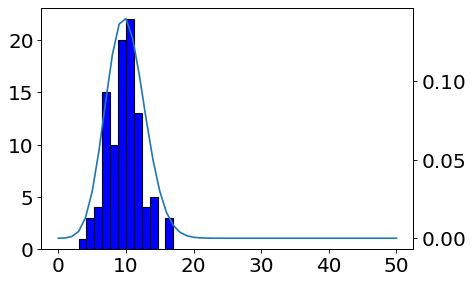

In [30]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


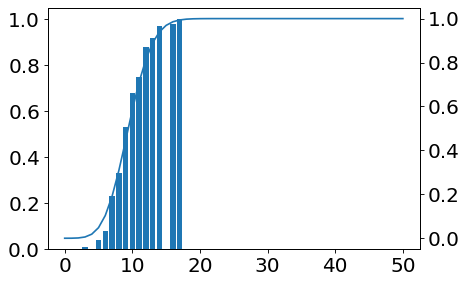

In [31]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [32]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.62  teórica:  10.0
varianza empírica: 6.775599999999998  teórica:  8.0
asimetría empírica: 0.4195219370612125 teórica:  0.21213203435596423
curtosis empírico:  0.29948683496611395 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

In [33]:
#Distribución de poisson 

size = 100
n = 50
mu_arr = [random.randint(3,20) for _ in range(4)]
datos_poisson = stats.poisson.rvs(mu=mu, size=size) 
binwidth = 4

for 

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'red', edgecolor = 'black', bins = int(n/binwidth))

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
pvec = [stats.poisson.pmf(k=i, mu=mu) for i in vec]

ax2.plot(vec,pvec)
plt.draw()

SyntaxError: invalid syntax (<ipython-input-33-1833df732087>, line 9)

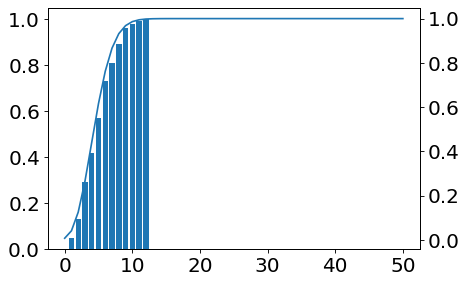

In [34]:
## gráfica de la distribución POISSON empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x, cum_poisson = ecdf(datos_poisson)
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
pvec = [stats.poisson.cdf(k=i, mu=mu) for i in vec]

ax2.plot(vec,pvec)
plt.draw()


In [35]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio) * (datos_poisson - promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)
print("*** Distribución de Poison ***")
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

*** Distribución de Poison ***
esperanza empírica: 5.18  teórica:  10.0
varianza empírica: 5.927600000000002  teórica:  8.0
asimetría empírica: 0.38479550140199564 teórica:  0.21213203435596423
curtosis empírico:  -0.37798507460477637 teórico:  0.004999999999999977


#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

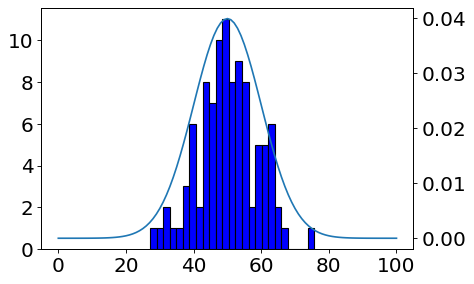

In [36]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


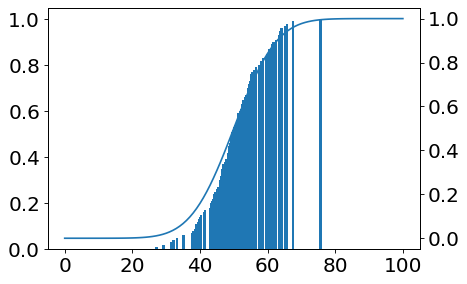

In [37]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [38]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 50.137536704859976  teórica:  50
varianza empírica: 78.16105974606033  teórica:  100
asimetría empírica: -0.03612616246136741 teórica:  0
curtosis empírico:  0.15383577684199246 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

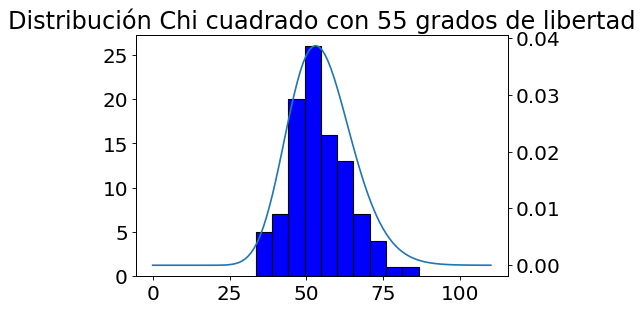

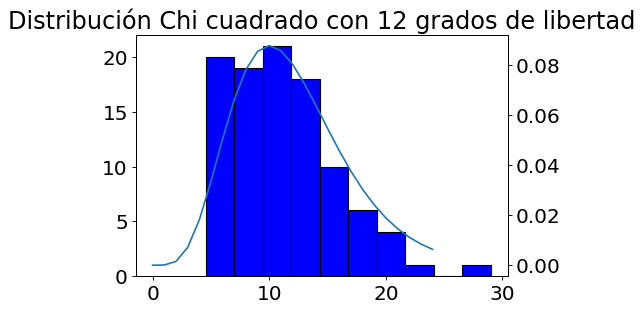

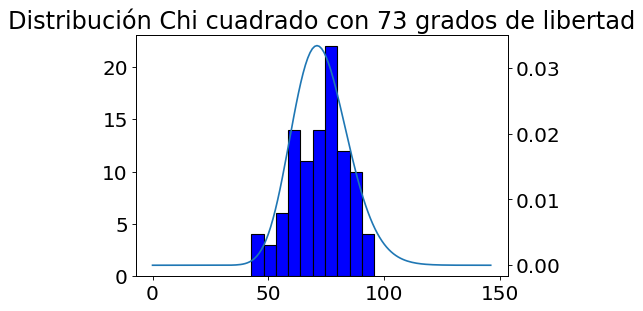

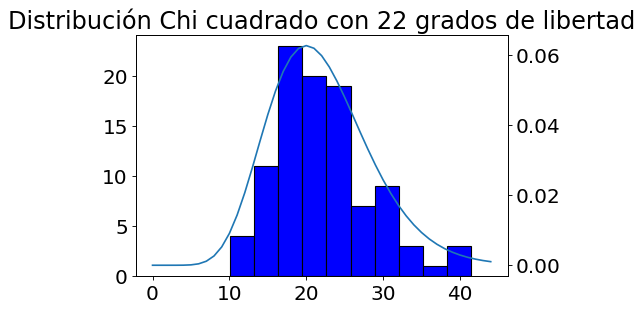

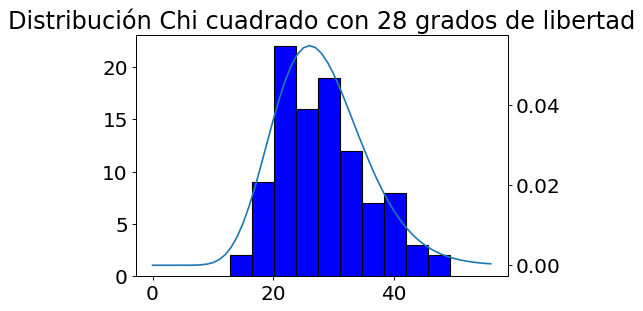

In [44]:
def plot_distribution(data, k, size):
    
    fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
    ax.hist(datos_chi2, color = 'blue', edgecolor = 'black')
    ax.set_title("Distribución Chi cuadrado con {} grados de libertad".format(k))
    ## probabilidad teórica
    ax2 = ax.twinx()
    vec = list(range(2*k+1))
    pvec = [stats.chi2.pdf(x=i, df=k) for i in vec]

    ax2.plot(vec,pvec)
    plt.draw()


# Distribución Chi-cuadrado
import random 
size = 100

k_teorico = 55
k_arr = [random.randint(10,80) for _ in range(4)]  # grados de libertad aleatorios
sigma = 10
binwidth = 4
datos_chi2 = stats.chi2.rvs(df=k_teorico, size=size)

plot_distribution(datos_chi2, k_teorico, size)

for k_emp in k_arr: 
    datos_chi2 = stats.chi2.rvs(df=k_emp, size=size)
    plot_distribution(datos_chi2, k_emp, size)


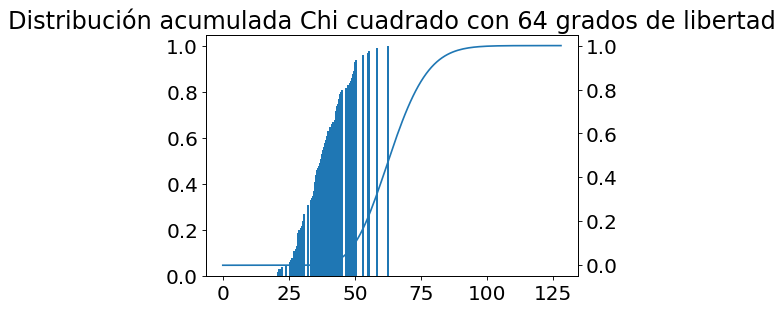

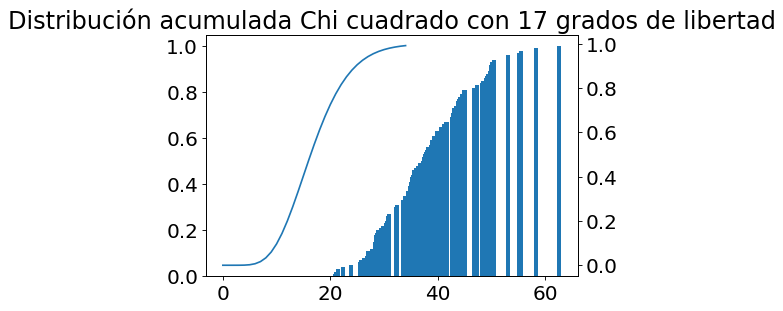

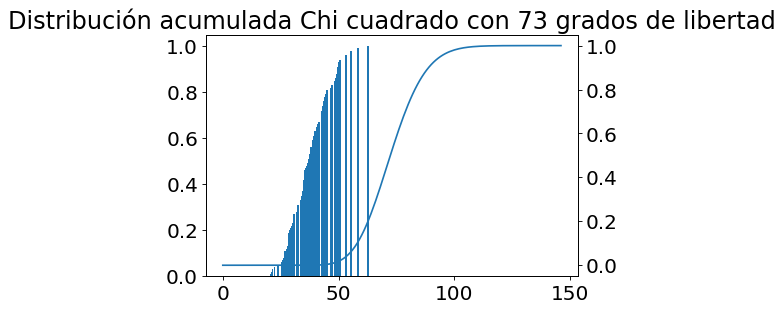

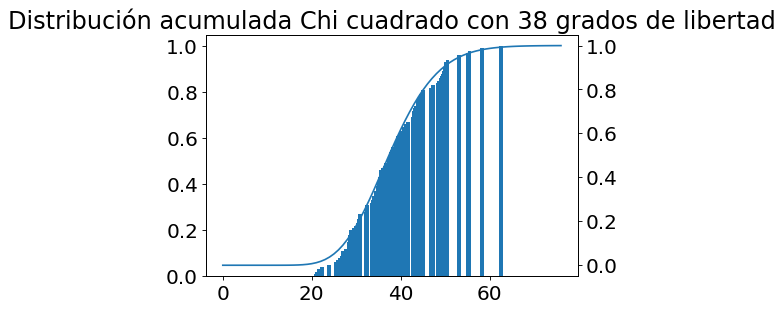

In [40]:
## gráfica de la distribución empírica Chi-cuadrado acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

for k in k_arr:
    fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

    x, cum_chi2 = ecdf(datos_chi2)
    ax.bar(x, cum_chi2)
    ax.set_title("Distribución acumulada Chi cuadrado con {} grados de libertad".format(k))
    ## probabilidad teórica
    ax2 = ax.twinx()
    vec = list(range(2 * k+1))
    pvec = [stats.chi2.cdf(x=i, df=k) for i in vec]

    ax2.plot(vec,pvec)
    plt.draw()



In [41]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi2)/size
var_emp = sum((datos_chi2 - promedio) * (datos_chi2 - promedio)) / size
asim = stats.skew(datos_chi2)
curtos = stats.kurtosis(datos_chi2)
print('esperanza empírica:', promedio,' teórica: ', k)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)

esperanza empírica: 37.85011162640614  teórica:  38
varianza empírica: 78.30085718952664  teórica:  100
asimetría empírica: 0.3152459554553651 teórica:  0
curtosis empírico:  -0.3812675595004187 teórico:  0


#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
